<a href="https://colab.research.google.com/github/theyashmishra/Weather-Detection/blob/main/Weather_Detection_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1. Load data directory from Kaggle using API


In [1]:
import os
import warnings
import random
from shutil import copyfile
#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
#deep learning libraries
from keras.optimizers import Adam
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#importing data directly from kaggle using kaggle api
os.environ['KAGGLE_USERNAME']="theyashmishra"
os.environ['KAGGLE_KEY']="45d3832331831cbbd093dbd45272c90a"


In [3]:
!kaggle datasets download -d vijaygiitk/multiclass-weather-dataset

 94% 126M/134M [00:00<00:00, 149MB/s]
100% 134M/134M [00:01<00:00, 138MB/s]


In [4]:
from zipfile import ZipFile
filename="/content/multiclass-weather-dataset.zip"
with ZipFile(filename,'r') as zip:
  zip.extractall()
  print("done")

done


Step 2. Exploratory Data Analysis (EDA)

In [5]:
import warnings
warnings.filterwarnings('ignore')
data_dir_list=os.listdir('/content/dataset')
#get all the path
print(data_dir_list)
path, dirs,files=next(os.walk("/content/dataset"))
file_count=len(files)

['test.csv', 'sunrise', 'foggy', 'cloudy', 'alien_test', 'shine', 'rainy']


In [6]:
#Make new base directory
original_dataset_dir='/content/dataset'
base_dir='/content/weather-data'
os.mkdir(base_dir)

In [7]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Under train folder create five folders 
# (cloud, folly, rainy, shine, sunrise)

train_cloud_dir = os.path.join(train_dir, 'cloudy')
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'foggy')
os.mkdir(train_foggy_dir)

train_rainy_dir = os.path.join(train_dir, 'rainy')
os.mkdir(train_rainy_dir)

train_shine_dir = os.path.join(train_dir, 'shine')
os.mkdir(train_shine_dir)

train_sunrise_dir = os.path.join(train_dir, 'sunrise')
os.mkdir(train_sunrise_dir)

#Under validation folder create five folders 
# (cloud, folly, rainy, shine, sunrise)

validation_cloud_dir = os.path.join(validation_dir, 'cloudy')
os.mkdir(validation_cloud_dir)

validation_foggy_dir = os.path.join(validation_dir, 'foggy')
os.mkdir(validation_foggy_dir)

validation_rainy_dir = os.path.join(validation_dir, 'rainy')
os.mkdir(validation_rainy_dir)

validation_shine_dir = os.path.join(validation_dir, 'shine')
os.mkdir(validation_shine_dir)

validation_sunrise_dir = os.path.join(validation_dir, 'sunrise')
os.mkdir(validation_sunrise_dir)

In [8]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [9]:
CLOUDY_SOURCE_DIR = '/content/dataset/cloudy/'
TRAINING_CLOUDY_DIR = '/content/weather-data/train/cloudy/'
VALID_CLOUDY_DIR = '/content/weather-data/validation/cloudy/'

FOGGY_SOURCE_DIR = '/content/dataset/foggy/'
TRAINING_FOGGY_DIR = '/content/weather-data/train/foggy/'
VALID_FOGGY_DIR = '/content/weather-data/validation/foggy/'

RAINY_SOURCE_DIR = '/content/dataset/rainy/'
TRAINING_RAINY_DIR = '/content/weather-data/train/rainy/'
VALID_RAINY_DIR = '/content/weather-data/validation/rainy/'

SHINE_SOURCE_DIR = '/content/dataset/shine/'
TRAINING_SHINE_DIR = '/content/weather-data/train/shine/'
VALID_SHINE_DIR = '/content/weather-data/validation/shine/'

SUNRISE_SOURCE_DIR = '/content/dataset/sunrise/'
TRAINING_SUNRISE_DIR = '/content/weather-data/train/sunrise/'
VALID_SUNRISE_DIR = '/content/weather-data/validation/sunrise/'

In [10]:
split_size=0.85
split_data(CLOUDY_SOURCE_DIR,TRAINING_CLOUDY_DIR,VALID_CLOUDY_DIR,split_size)

split_data(FOGGY_SOURCE_DIR,
TRAINING_FOGGY_DIR,
VALID_FOGGY_DIR,split_size)

split_data(RAINY_SOURCE_DIR,
TRAINING_RAINY_DIR,
VALID_RAINY_DIR,split_size)

split_data(SHINE_SOURCE_DIR,
TRAINING_SHINE_DIR,
VALID_SHINE_DIR,split_size)

split_data(SUNRISE_SOURCE_DIR,
TRAINING_SUNRISE_DIR,
VALID_SUNRISE_DIR,split_size)

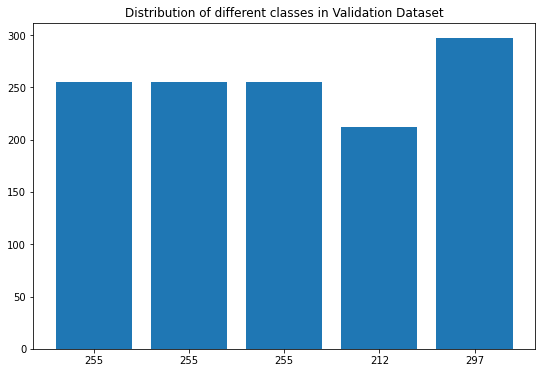

In [11]:
image_folder=['cloudy', 'foggy', 'rainy', 'shine','sunrise']
nimgs={}
for i in image_folder:
   nimages=len(os.listdir('/content/weather-data/train/'+i+'/'))
   nimgs[i]=nimages
plt.figure(figsize=(9,6))
plt.bar(range(len(nimgs)),list(nimgs.values()),align='center')
plt.xticks(range(len(nimgs)),list(nimgs.values()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()


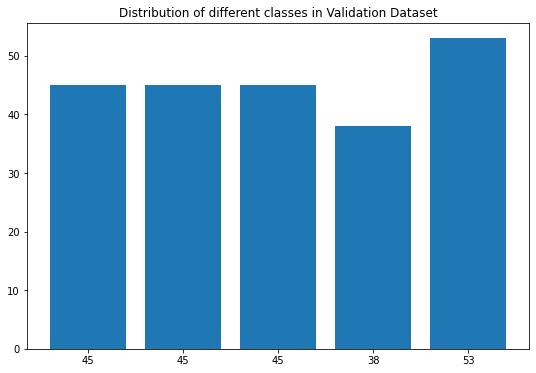

In [12]:
image_folder=['cloudy', 'foggy', 'rainy', 'shine','sunrise']
nimgs={}
for i in image_folder:
   nimages=len(os.listdir('/content/weather-data/validation/'+i+'/'))
   nimgs[i]=nimages
plt.figure(figsize=(9,6))
plt.bar(range(len(nimgs)),list(nimgs.values()),align='center')
plt.xticks(range(len(nimgs)),list(nimgs.values()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()


In [13]:
for i in ['cloudy', 'foggy', 'rainy', 'shine','sunrise']:
  print('valid {} images are: '.format(i)+str(len(os.listdir('/content/weather-data/validation/'+i+'/'))))

valid cloudy images are: 45
valid foggy images are: 45
valid rainy images are: 45
valid shine images are: 38
valid sunrise images are: 53


Step 3. Deep Learning with Data Augumentation

In [14]:
img_width=256; img_height=256
batch_size=16
TRAINING_DIR='/content/weather-data/train/'
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
      TRAINING_DIR,
        target_size=(256, 256),
        batch_size=16,
        class_mode='categorical',
        )

Found 1274 images belonging to 5 classes.


In [15]:
VALIDATION_DIR='/content/weather-data/validation'
validation_datagen= ImageDataGenerator(rescale=1./255)
validation_generator=validation_datagen.flow_from_directory(
       VALIDATION_DIR,
        target_size=(256, 256),
        batch_size=16,
        class_mode='categorical')

Found 226 images belonging to 5 classes.


In [16]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks=EarlyStopping(monitor='val_loss', patience=5, verbose=1,mode='auto')
best_model_file='/content/CNN_aug_best_weight.h5'
best_model=ModelCheckpoint(best_model_file,monitor='val_acc', verbose=1,save_best_only='true')

In [17]:
model=Sequential([
                  Conv2D(16, (3,3),input_shape=(256,256,3), activation='relu'),
                   Conv2D(32, (3,3), activation='relu'),
                   MaxPooling2D(2,2),
                    Conv2D(64, (3,3), activation='relu'),
                     Conv2D(64, (3,3), activation='relu'),
                          MaxPooling2D(2,2) ,
                     Conv2D(128, (3,3), activation='relu'),
                     Conv2D(128, (3,3), activation='relu'),
                          MaxPooling2D(2,2)  ,
                           Conv2D(256, (3,3), activation='relu'),
                     Conv2D(256, (3,3), activation='relu'),
                          MaxPooling2D(2,2) ,
                          Flatten(),
                          Dense(256,activation='relu')  ,
                           Dense(256,activation='relu')  ,   
                         Dense(5,activation='softmax')  
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 59, 59, 128)       7

In [19]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
history=model.fit_generator(
        train_generator,
        epochs=40,
        validation_data=validation_generator,
        callbacks=[best_model])

Epoch 1/40
80/80 [==============================] - 76s 378ms/step - loss: 1.5728 - accuracy: 0.2705 - val_loss: 1.2579 - val_accuracy: 0.4735
Epoch 2/40
80/80 [==============================] - 28s 351ms/step - loss: 1.2103 - accuracy: 0.4733 - val_loss: 1.0324 - val_accuracy: 0.5088
Epoch 3/40
80/80 [==============================] - 28s 348ms/step - loss: 0.9494 - accuracy: 0.5999 - val_loss: 0.8853 - val_accuracy: 0.6195
Epoch 4/40
80/80 [==============================] - 28s 349ms/step - loss: 0.9465 - accuracy: 0.5962 - val_loss: 0.8990 - val_accuracy: 0.6549
Epoch 5/40
80/80 [==============================] - 28s 350ms/step - loss: 0.9301 - accuracy: 0.6079 - val_loss: 0.8518 - val_accuracy: 0.6372
Epoch 6/40
80/80 [==============================] - 28s 355ms/step - loss: 0.8083 - accuracy: 0.6788 - val_loss: 0.8305 - val_accuracy: 0.6637
Epoch 7/40
80/80 [==============================] - 28s 348ms/step - loss: 0.8198 - accuracy: 0.6672 - val_loss: 0.9485 - val_accuracy: 0.6283

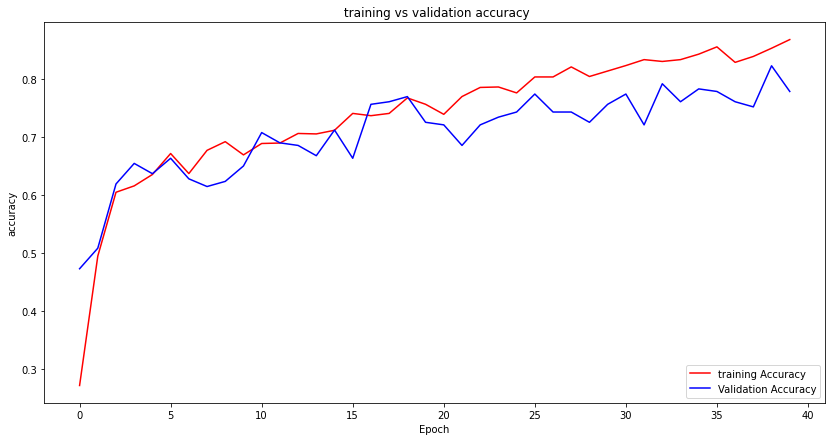

In [21]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig=plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r', label='training Accuracy')
plt.plot(epochs,val_acc,'b', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title(' training vs validation accuracy')
plt.legend(loc='lower right')
plt.show()


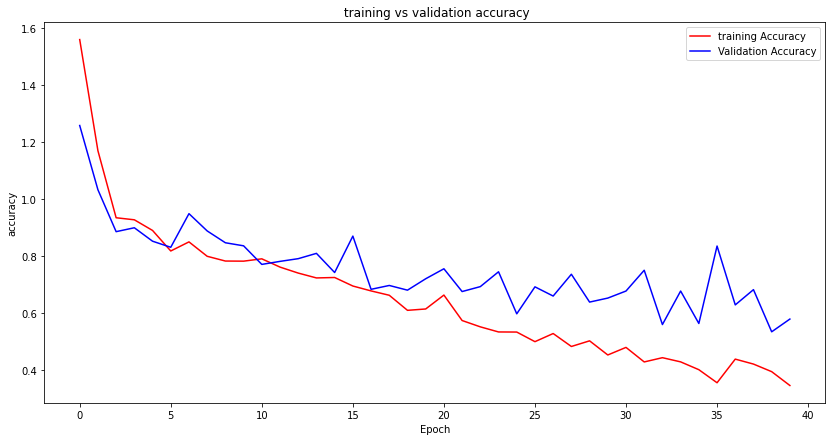

In [22]:
fig2=plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r', label='training Accuracy')
plt.plot(epochs,val_loss,'b', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title(' training vs validation accuracy')
plt.legend(loc='upper right')
plt.show()


In [23]:
#testing our model on test data

def preprocess_img(path):
  img=load_img(path,target_size=(256,256))
  ar=img_to_array(img)
  ar=np.expand_dims(ar,axis=0)
  ar/=255.
  return ar


Step 4. Checking performance on Test Data (Out of the sample)

In [24]:
from keras.preprocessing.image import load_img, img_to_array
import pandas as pd
import numpy as np
test_images_dir = '/content/dataset/alien_test/'
test_df = pd.read_csv('/content/dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_img(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [25]:
array=model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer=np.argmax(array,axis=1)
print(answer)

30/30 [==============================] - 1s 3ms/step
[1 0 3 3 1 2 1 2 0 1 4 1 2 1 4 2 2 0 2 2 3 3 3 4 4 4 4 4 4 4]


In [26]:
test_df=pd.read_csv('/content/dataset/test.csv')
y_true=test_df['labels']
y_pred=array
print(y_true)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: labels, dtype: int64


In [27]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_true,answer)

print(conf_mat)


[[1 1 0 2 0]
 [1 5 3 0 1]
 [1 0 4 0 1]
 [0 0 0 3 0]
 [0 0 0 0 7]]


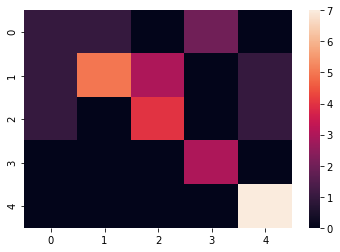

In [28]:
sns.heatmap(conf_mat)


In [33]:
import pickle 
if not os.path.isdir('models'):
    os.mkdir('models')

model.save('models/basic.h5')

